In [19]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

# Ordinary Differential Equations (ODEs)

## Analytical solution

We model a batch reactor. In the batch reactor, component $A$ reacts to component $B$ with the rate constant $k=0.2\, min^{-1}$.

$A \xrightarrow{k} B$

The resulting evolution of component concentrations $C_A$ and $C_B$ are:

$\frac{dC_A}{dt}=-kC_A$

$\frac{dC_B}{dt}=kC_A$

At the beginning of the reaction, only $A$ present (initial condition).

$C_A(t=0\,s)=1\, mol/L$

$C_B(t=0\,s)=0\, mol/L$

Define parameters.

In [20]:
# time domain
t_start = 0.0
t_end = 30.0
n = 500
t = np.linspace(t_start, t_end, n)
dt = t[1]-t[0]

# initial condition
cA_0 = 1.0
cA_0 = 0.0

# kinetic constant
k = 0.2

Define analytical solution.

$C_A(t)=e^{-kt}\, mol/L$

$C_B(t)=1-e^{-kt}\, mol/L$

In [21]:
def cA(k: float, t: float) -> float:
    return np.exp(-k*t)

def cB(k: float, t: float) -> float:
    return 1 - np.exp(-k*t)

Plot the results.

/tmp/ipykernel_1669/180251460.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


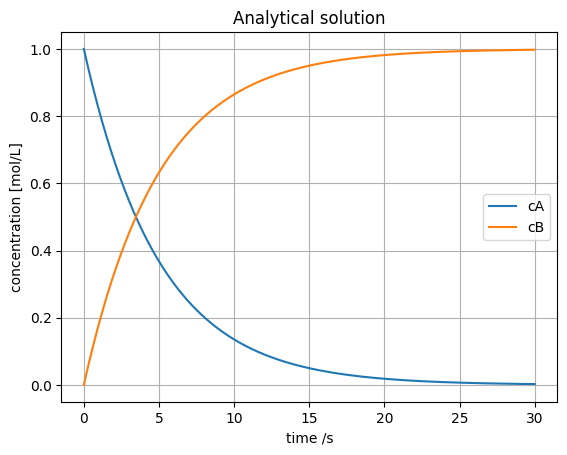

In [22]:
fig, ax = plt.subplots()
ax.plot(t, cA(k, t), label = "cA")
ax.plot(t, cB(k, t), label = "cB")
ax.set_xlabel("time /s")
ax.set_ylabel("concentration [mol/L]")
ax.set_title("Analytical solution")
ax.legend()
ax.grid()
fig.show()

## Analytical solution - linear system of ODEs

Solve the following reaction system analytically.

$A \xrightleftharpoons[k_2]{k_1} B \xrightleftharpoons[k_4]{k_3} C$

Initial conditions:

$C_A(0)=1\, mol/L$

$C_B(0)=C_C(0)=0\, mol/L$

Rate constants:

$k_1=1\, min^{-1}, k_2=0\, min^{-1}, k_3=2\, min^{-1}, k_4=3\, min^{-1}$


Define parameters.

In [23]:
# initial condition
c_0 = np.array([1,0,0])

In [24]:
# matrix of the rates
K = np.array([[-1,0,0],[1,-2,3],[0,2,-3]])

Calculate exponential of matrix.

Note: `expm` vs `exp` in scipy
- `exmp`: matrix exponentiation $e^A=Ue^\lambda U^{-1}$
- `exp`: scalar value exponentiation $e^x, x \in \mathbb{R}$


In [25]:
eK = K * dt
eKdt = sp.linalg.expm(eK)

In [26]:
C = [c_0]
for i in range(len(t)-1):
    c_0 = np.dot(eKdt,c_0)
    C.append(c_0)

In [27]:
# extract values
cA = [array[0] for array in C]
cB = [array[1] for array in C]
cC = [array[2] for array in C]

Plot the results.

/tmp/ipykernel_1669/2965777143.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


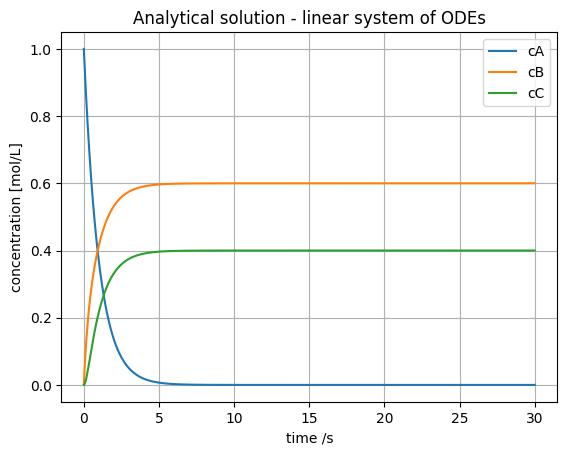

In [28]:
fig, ax = plt.subplots()
ax.plot(t, cA, label = "cA")
ax.plot(t, cB, label = "cB")
ax.plot(t, cC, label = "cC")
ax.set_xlabel("time /s")
ax.set_ylabel("concentration [mol/L]")
ax.set_title("Analytical solution - linear system of ODEs")
ax.legend()
ax.grid()
fig.show()

# Initial value problems (IVPs)

## The Forward Euler method

We analyze the semi-batch reactor. The reactor model contains a non-autonomous term (right hand-side contains the independent variable $t$ explicitly).

$\frac{dC_A}{dt}=\frac{\dot{V}}{V_0+\dot{V}t}\left(C_A^{in}-C_A\right)-kC_A$

$\frac{dC_B}{dt}=kC_A$

Initial contitions:

$C_A(t=0\,s)=1\, mol/L,\; C_B(0)=0\, mol/L$


Define the reaction system.

In [29]:
# reaction system
def dC(t, c):
    cA, _ = c
    k = 0.2
    Vdot = 0.1
    V_0 = 10
    cA_in = 0.5
    dcA = Vdot/(V_0+Vdot*t)*(cA_in-cA)-k*cA
    dcB = k*cA
    return np.array([dcA, dcB])

Define forward euler method.

In [30]:
def forward_euler(func: Callable, yi: np.ndarray, ti: float, dt: float) -> np.ndarray:
    return yi+dt*func(ti, yi)

Execute forward euler method.

In [31]:
c = np.zeros((2,len(t)))
# initial condition
c[:,0] = [1, 0]
for i in range(1,len(t)):
    c[:,i] = forward_euler(dC, c[:,i-1], t[i-1], dt)

Plot the results.

/tmp/ipykernel_1669/473474845.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


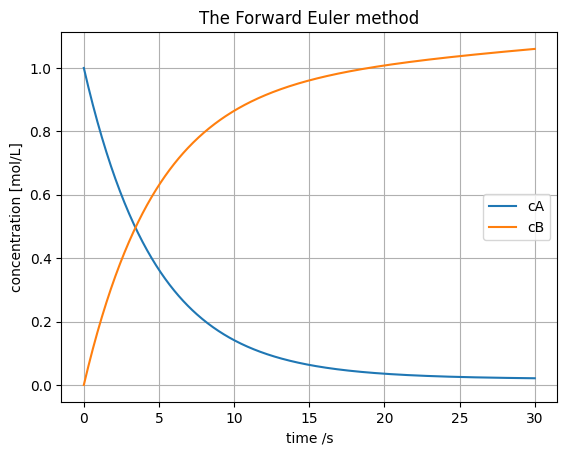

In [38]:
fig, ax = plt.subplots()
ax.plot(t, c[0,:], label = "cA")
ax.plot(t, c[1,:], label = "cB")
ax.set_xlabel("time /s")
ax.set_ylabel("concentration [mol/L]")
ax.set_title("The Forward Euler method")
ax.legend()
ax.grid()
fig.show()

## The Backward Euler method

Plot the results.

/tmp/ipykernel_1669/473474845.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


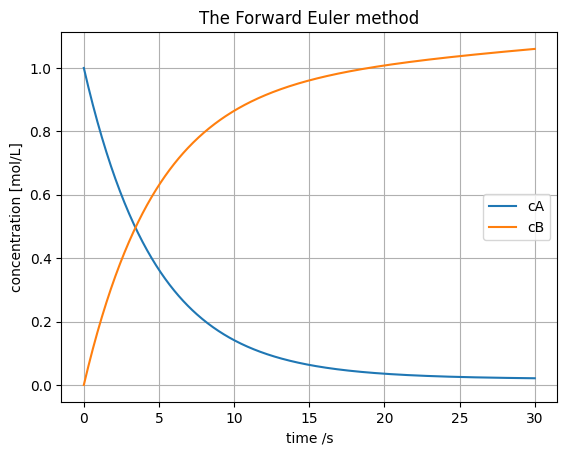

In [ ]:
fig, ax = plt.subplots()
ax.plot(t, c[0,:], label = "cA")
ax.plot(t, c[1,:], label = "cB")
ax.set_xlabel("time /s")
ax.set_ylabel("concentration [mol/L]")
ax.set_title("The Backward Euler method")
ax.legend()
ax.grid()
fig.show()

## SciPy's `solve_ivp`

We analyze the same system as for [Analytical solution - linear system of ODEs](#Analytical-solution-linear-system-of-ODEs).

Define the reaction system.

In [33]:
# rate constants 
k = [1, 0, 2, 3]

In [34]:
# initial condition
c_0 = np.array([1,0,0])

In [35]:
# reaction system
def dC(t, c, k):
    dcA = -k[0]*c[0]+k[1]*c[1]
    dcB = k[0]*c[0]+k[3]*c[2]-(k[1]+k[2])*c[1]
    dcC = -k[3]*c[2]+k[2]*c[1]
    return [dcA, dcB, dcC]

Solve the IVP using SciPy's `solve_ivp` function.

In [36]:
results = sp.integrate.solve_ivp(dC, (t[0],t[-1]), c_0, t_eval=t, args=(k,))
cA = results['y'][0]
cB = results['y'][1]
cC = results['y'][2]

Plot the results.

/tmp/ipykernel_1669/3777440651.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


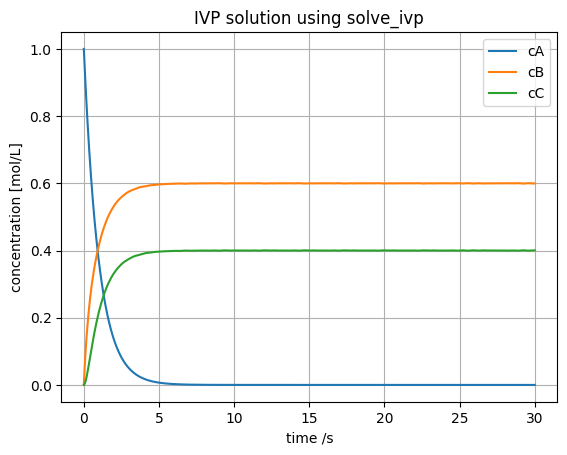

In [37]:
fig, ax = plt.subplots()
ax.plot(t, cA, label = "cA")
ax.plot(t, cB, label = "cB")
ax.plot(t, cC, label = "cC")
ax.set_xlabel("time /s")
ax.set_ylabel("concentration [mol/L]")
ax.set_title("IVP solution using solve_ivp")
ax.legend()
ax.grid()
fig.show()